# 심층 신경망

In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 2개의 층

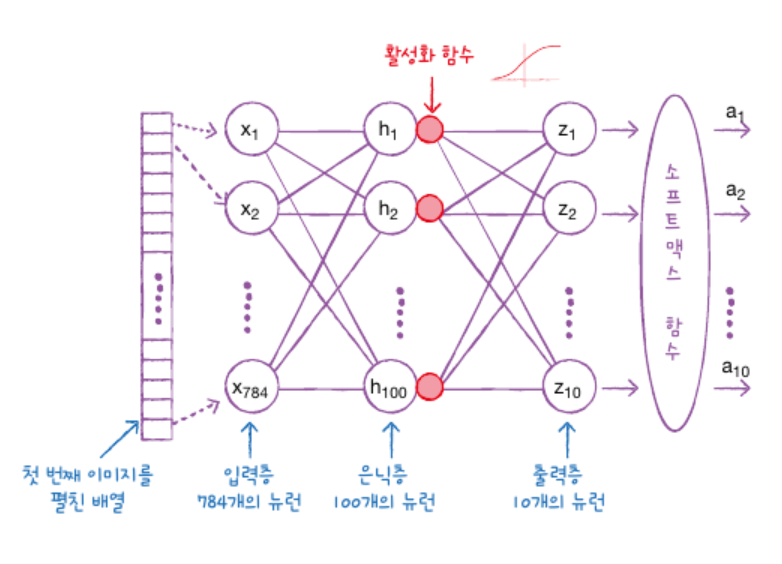

인공 신경망 모델에 층을 2개 추가: *입력층과 은닉층*   
입력층과 출력층 사이에 있는 모든 층 = **은닉층(hidden layer)**   

출력층의 활성화함수: [제한적] '시그모이드'(이진분류), '소프트맥스'(다중분류)   
은닉층의 활성화함수: [비교적 자유로움] '시그모이드', '렐루(ReLU) 함수' 등   

~~참고) 분류 문제는 활성화 함수를 사용하지만, 회귀의 출력은 활성화 함수를 적용할 필요가 없다.~~    
~~즉, 출력층의 선형 방정식의 계산을 그대로 출력(Dense 층의 activation에 아무런 값을 지정하지 않음)~~

In [ ]:
from tensorflow import keras

# 데이터 셋 불러오기
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [ ]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0              # 정규화
train_scaled = train_scaled.reshape(-1, 28*28)  # 1차원으로 reshape

# 검증 세트 split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
# 훈련 세트와 검증 세트 shape 확인
print(train_scaled.shape)
print(val_scaled.shape)

(48000, 784)
(12000, 784)


## 심층 신경망 만들기

<은닉층 활성화 함수 1>   
**시그모이드 함수**: 뉴런의 출력 z 값을 0과 1 사이로 출력   
은닉층에서 시그모이드 함수가 주로 쓰인다.

##### 인공 신경망의 강력한 성능은 <u>**층을 추가**하여 입력 데이터에 대해 연속적인 학습</u>을 진행하는 능력에서 나온다.

1. 층 추가 방법 1: dense를 따로 지정, sequential 클래스에 리스트로 추가

In [ ]:
# dense를 따로 지정(= 틀 만들기)해주고 나서 model에 매개변수로 삽입
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))      # 은닉층, 100개(출력층의 뉴런 개수보다 커야한다)의 뉴런을 가진 밀집층
dense2 = keras.layers.Dense(10, activation='softmax')                           # 출력층, 10개(10개의 클래스를 분류)의 뉴런을 가진 밀집층

In [6]:
# sequential 클래스에 추가: 여러개의 층을 추가하려면 dense의 리스트로 만들어 전달. 은닉층 - 출력층 순서대로!
model = keras.Sequential([dense1, dense2])                                      # 순서가 바뀌지 않게 주의

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


!!! 주의) 아직 fit() 메서드에 훈련 데이터를 주입하지 않은 상태.

## 층을 추가하는 다른 방법

2. 층 추가 방법 2 - Sequential 클래스에 바로 Dense 클래스 사용하여 속성 지정

In [8]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')

In [9]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


3. 층 추가 방법 3 - 빈 Sequential 클래스를 먼저 만들어준 후, add 메서드로 층 추가

이 방법을 가장 많이 쓴다.

In [13]:
model = keras.Sequential(name = "패션 MNIST 모델 - add 사용")
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "패션 MNIST 모델 - add 사용"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 모델 훈련은 compile() 메서드로 손실함수와 metrics 설정 후 fit() 메서드로 훈련 실시
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 8s 3ms/step - loss: 0.5710 - accuracy: 0.8064
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4132 - accuracy: 0.8509
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3776 - accuracy: 0.8646
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3530 - accuracy: 0.8732
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3344 - accuracy: 0.8782


## 렐루 활성화 함수

<은닉층 활성화 함수 2>
**렐루 함수**: 입력이 양수일 경우 활성화 함수가 없는 것처럼 그냥 입력을 통과시키고,   
입력이 음수일 경우에는 0으로 만든다.   

렐루 함수는 이미지 처리에서 좋은 성능을 낸다.   
이전에는 reshape()를 이용해 직접 1차원으로 펼쳤다면, 케라스에서는 Flatten 층을 제공하여 reshape 과정을 거치지 않아도 된다. 

In [21]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))       # Flatten 클래스를 이용해 배치 차원을 제외하고 나머지 입력 차원을 일렬로 펼친다.
                                                            # 층처럼 입력층과 은닉층 사이에 추가하기 때문에 이를 Flatten 층이라 부른다.
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [22]:
model.summary()                                             # 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [23]:
# 데이터 새로 받기. reshape 없이 모델에 넣어줄 수 있다.
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
# reshape 생략

# 검증 데이터 떼어내기.
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [25]:
# 참고: 훈련 세트와 검증 세트 shape 확인: 2차원 그대로 있는 것을 확인할 수 있다.
print(train_scaled.shape)
print(val_scaled.shape)

(48000, 28, 28)
(12000, 28, 28)


입력 데이터에 대한 전처리 과정을 가능한 '모델 안에 포함'시키는 것이 케라스 API의 철학

In [26]:
# compile과 fit 메서드 실행
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5354 - accuracy: 0.8093
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3945 - accuracy: 0.8558
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3537 - accuracy: 0.8714
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3302 - accuracy: 0.8802
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3132 - accuracy: 0.8859


▼ **렐루 함수**에서 시그모이드 함수보다 성능이 조금 향상되었다.

In [27]:
model.evaluate(val_scaled, val_target)
# 은닉층을 추가하지 않은 경우보다 몇 퍼센트 성능이 향상됨.

375/375 [==============================] - 1s 2ms/step - loss: 0.3857 - accuracy: 0.8686


[0.38565924763679504, 0.8685833215713501]

## 옵티마이저
옵티마이저 종류와 적용 방법을 알아보자.   

케라스는 기본적으로 경사 하강법 알고리즘 RMSprop을 사용했다.   
이 외의 <u>다른 경사 하강법 알고리즘을 사용</u>하려면 compile() 메서드에서 optimizer(옵티마이저) 매개변수를 조정하면 된다.    

**<옵티마이저 종류>**
1. SGD : optimizer='sgd'
2. Adagrad : optimizer='adagrad'
3. RMSprop : optimizer='rmsprop'
4. Adam : optimizer='adam'

참고) 케라스는 기본적으로 '미니배치 경사 하강법'을 사용하며, 미니배치 개수는 32개.   
fit() 메서드에서 batch_size 매개변수로 조정할 수 있다.

1. SGD 옵티마이저

In [28]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
# ▼ (참고1) 아래 코드는 위 코드로 축약 가능. 
# 'sgd'라는 옵티마이저에 클래스를 이미 저장해두어서 손쉽게 쓸 수 있다.
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [30]:
# (참고2) learning_rate 기본값을 변경해주고 싶다면 매개변수를 지정할 수 있다.
sgd = keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [29]:
# (참고3)
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)     # momentum 기본값 0 
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')
# 0보다 큰 값은 이전의 그레이디언트를 가속도처럼 사용하는 모멘텀 최적화를 사용. 보통 0.9 이상 지정. 
# True로 변경하면 네스테로프 모멘텀 최적화(nesterov momentum optimization = 네스테로프 가속 경사) 사용

>>> **적응적 학습률(adaptive learning rate)**   
모델이 최적점에 가까이 갈수록 학습률을 낮춘다.   
안정적으로 최적점에 수렴할 가능성을 높이는 방식이다.   

위에서 쓴 '네스테로프 모멘텀'은 최적화를 2번 반복하여 구현.   
기본 확률적 경사 하강법보다 더 나은 성능을 제공한다.   

2. Adagrad 옵티마이저   
마찬가지로 optimizer='adagrad'로 쓸 수 있다.

In [ ]:
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')

3. RMSprop 옵티마이저   
마찬가지로 optimizer='rmsprop'로 쓸 수 있다.

In [ ]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

4. Adam 옵티마이저   
모멘텀의 최적화와 RMSProp의 장점을 접목한 것이 Adam.   
적응적 학습률을 사용하는 Adagrad, RMSprop, Adam은 learning_rate의 기본값으로 모두 0.001 사용

In [31]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [32]:
# optimizer를 'adam'으로 설정하고 5번의 에포크동안 훈련
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5198 - accuracy: 0.8176
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3910 - accuracy: 0.8592
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3539 - accuracy: 0.8715
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3277 - accuracy: 0.8805
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3055 - accuracy: 0.8874


In [33]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3428 - accuracy: 0.8737


[0.342822790145874, 0.8737499713897705]

RMSprop을 사용했을 때보다 조금 나은 성능을 낸다.